In [1]:
import h5py as hp
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbs
from aps_figures.aps_one_column import *
from SOLEILII_parameters.SOLEILII_TDR_parameters import *
N_SEGMENTS = 416
SIGMA_Y = 9.820578e-06
FOLDER = 'Results/'
# FOLDER = '/home/gubaidulin/scripts/fbii_pyht_tracking/Results/TDR/force=GS,n_gap=2/'
# FOLDER = '/home/gubaidulin/scripts/fbii_pyht_tracking/Results/TDR/force=GS,n_gap=0/'
# FOLDER = '/home/gubaidulin/scripts/fbii_pyht_tracking/Results_sumo/Gaps/'
n_macroparticles = 5e3
n_macroparticles_ions = 1e4
n_gaps = 1
# FOLDER += 'n_mp={:.1e},n_mp_ions={:.1e},n_gaps={:.1e}/'.format(n_macroparticles, n_macroparticles_ions, n_gaps)
def read_bunch(bunch_number, n_macroparticles):
    # filename = FOLDER+'n_mp={:.1e},n_mp_ions={:.1e},n_gaps={:.1e}/'.format(n_macroparticles, n_macroparticles_ions, n_gaps)+'BM_(n_bunch={:}, n_macro={:.1e}, n_macro_ions={:.1e}).h5'.format(bunch_number, n_macroparticles, n_macroparticles_ions)
    # filename = FOLDER+'BM_(n_bunch={:}, n_macro={:.1e}, n_macro_ions={:.1e}).h5'.format(bunch_number, n_macroparticles, n_macroparticles_ions)
    # filename = FOLDER+'BM(n_bunch={:}).h5'.format(bunch_number)
    filename = FOLDER+'BM_n={:}.h5'.format(bunch_number)
    file = hp.File(filename)
    mean_x = file['Bunch']['mean_x'][:]
    sigma_x = file['Bunch']['sigma_x'][:]
    mean_xp = file['Bunch']['mean_xp'][:]
    mean_y = file['Bunch']['mean_y'][:]
    sigma_y = file['Bunch']['sigma_y'][:]
    mean_yp = file['Bunch']['mean_yp'][:]
    mean_z = file['Bunch']['mean_z'][:] 
    mean_dp = file['Bunch']['mean_dp'][:]
    file.close()
    return mean_x, sigma_x, mean_xp, mean_y, sigma_y, mean_yp, mean_z, mean_dp
def read_ion_element(index):
    # filename = FOLDER+'n_mp={:.1e},n_mp_ions={:.1e},n_gaps={:.1e}/'.format(n_macroparticles, n_macroparticles_ions, n_gaps)+'IM(ind={0:}).h5'.format(int(index))
    filename = FOLDER+'IM(ind={0:}).h5'.format(int(index))
    
    file = hp.File(filename)
    mean_x = file['Bunch']['mean_x'][:]
    sigma_x = file['Bunch']['sigma_x'][:]
    mean_xp = file['Bunch']['mean_xp'][:]
    mean_y = file['Bunch']['mean_y'][:]
    sigma_y = file['Bunch']['sigma_y'][:]
    mean_yp = file['Bunch']['mean_yp'][:]
    mean_z = file['Bunch']['mean_z'][:]
    mean_dp = file['Bunch']['mean_dp'][:]
    file.close()
    return mean_x, sigma_x, mean_xp, mean_y, sigma_y, mean_yp, mean_z, mean_dp
def read_ion_particles(index, step):
    # filename = FOLDER+'n_mp={:.1e},n_mp_ions={:.1e},n_gaps={:.1e}/'.format(n_macroparticles, n_macroparticles_ions, n_gaps)+'IPM(ind={0:}).h5part'.format(int(index))
    filename = FOLDER+'IPM(ind={0:}).h5part'.format(int(index))
    file = hp.File(filename)
    # for step in range(file['Step']['x'][:])
    mean_x = file['Step#{:}'.format(step)]['x'][:]
    mean_xp = file['Step#{:}'.format(step)]['xp'][:]
    mean_y = file['Step#{:}'.format(step)]['y'][:]
    mean_yp = file['Step#{:}'.format(step)]['yp'][:]
    mean_z = file['Step#{:}'.format(step)]['z'][:] 
    mean_dp = file['Step#{:}'.format(step)]['dp'][:]
    file.close()
    return mean_x, mean_xp, mean_y, mean_yp, mean_z, mean_

9.820578e-06
(100,)


/tmp/ipykernel_60801/2336827582.py:48: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.savefig('Figures/n_gap_2_amplitudes.svg')


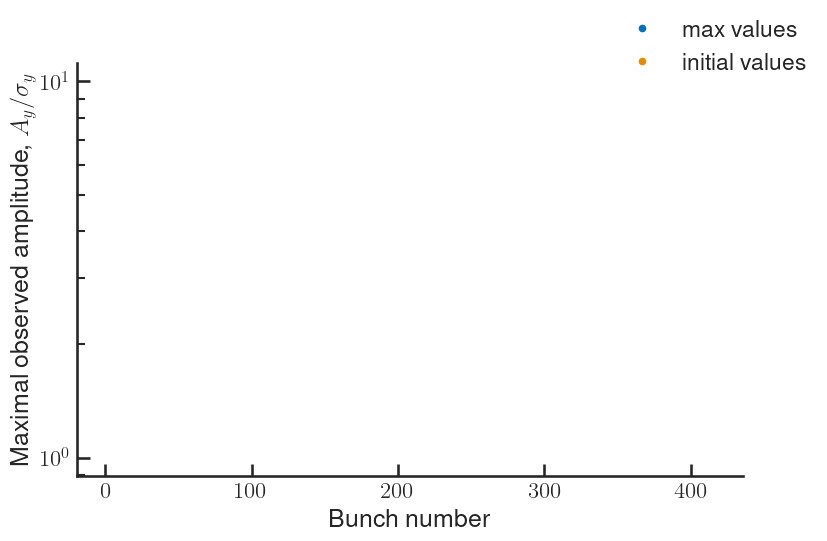

In [2]:
from FIT_FBII import fit_exponential_risetime, fit_sqrt_exponential_risetime, get_envelope
window_size = 35
fig, ax = plt.subplots(1, 1)
mean_y_beam = np.empty(shape=(int(H_RF*250*5),))
max_mean_y = np.empty(shape=(415,))
mean_y_init = np.empty(shape=(415,))
risetime_exponential = np.empty(shape=(415,))
risetime_sqrt = np.empty(shape=(415,))
for bunch_number in range(415):
    mean_x, sigma_x, mean_xp, mean_y, sigma_y, mean_yp, mean_z, mean_dp = read_bunch(bunch_number, n_macroparticles)
    sigma_y[0] = SIGMA_Y
    # ax.scatter(bunch_number, np.max(mean_x[-100:])/sigma_x[0], marker='.', color='b')
    for i, y in enumerate(mean_y):
        mean_y_beam[i*bunch_number:(i+1)*bunch_number] = y
    max_mean_y[bunch_number] = np.max(mean_y[:])
    mean_y_init[bunch_number] = mean_y[0]
    signal = np.sqrt(mean_y**2+(BETA_Y_SMOOTH*mean_yp)**2)/sigma_y[0]
    try:
        rx = fit_exponential_risetime(signal,
                                  min_level=1.1*np.mean(np.abs(signal[:10])), 
                                  smoothing_window_size=window_size, 
                                  start_from_0=False,
                                  matplotlib_axis = None
                                 )
        rx2 = fit_sqrt_exponential_risetime(signal,
                                        min_level=1.1*np.mean(np.abs(signal[:10])),
                                        start_from_0=False,
                                        smoothing_window_size=window_size, 
                                        matplotlib_axis = None
                                       )
        risetime_exponential[bunch_number] = rx/50
        risetime_sqrt[bunch_number] = rx2/50
    except:
        risetime_exponential[bunch_number] = None
        risetime_sqrt[bunch_number] = None
print(sigma_y[0])
print(mean_y.shape)
ax.semilogy(range(1, 416), max_mean_y[:]/sigma_y[0], marker='.', lw=0, label='max values')
ax.semilogy(range(1, 416), mean_y_init/sigma_y[0], marker='.', lw=0, zorder=0, label='initial values')

# ax.set_ylim(1e-3, 1)
# ax.set_xlim(1, H_RF)
ax.set_ylabel('Maximal observed amplitude, $A_y/\sigma_y$')
# ax.set_xticks([0, int(H_RF/4), int(2*H_RF/4), int(3*H_RF/4), H_RF])
ax.set_xlabel('Bunch number')
plt.figlegend()
# print(np.max(mean_y[-50:]))
plt.savefig('Figures/n_gap_2_amplitudes.svg')
plt.savefig('Figures/n_gap_2_amplitudes.pdf')

In [3]:
# fig, ax = plt.subplots(1, 1)
# def get_t_of_bunch_n(n, omega_e, omega_i, omega_0, L_sep=0.85, Q_y=18.2):
#     return 2*Q_y*omega_0/(n**2*omega_e**2*omega_i*L_sep/c)
# n = np.linspace(0, 415, 416)
# t = get_t_of_bunch_n(n, omega_e_y, omega_i_y, OMEGA_REV)
# ax.plot(n, t*2*pi*OMEGA_REV, color='black', label='Analytical approximation')
# ax.semilogy(risetime_exponential[:-50], linewidth=0, marker='.', color='b', label='Tracking results, w. $\exp{(t/t_0)}$ fit')
# ax.semilogy(risetime_sqrt[:-50], linewidth=0, marker='.', label='Tracking results, w. $\exp{(\sqrt{t/t_0})}$ fit', color='r')
# ax.set_xticks([0, 104, 208, 312, 416])
# ax.set_xlabel('Bunch number')
# ax.set_ylabel('Growth time (turns)')
# plt.figlegend()
# plt.savefig('Figures/Growthtimes_comparison.svg')
# plt.savefig('Figures/Growthtimes_comparison.pdf')

/tmp/ipykernel_60801/1117881934.py:10: RuntimeWarning: invalid value encountered in true_divide
  axlist[1].plot(fftfreq_beam/f_0, fft_beam/max(fft_beam))


Text(0.5, 0, 'Oscillation frequency, $\\omega_y/\\omega_0$')

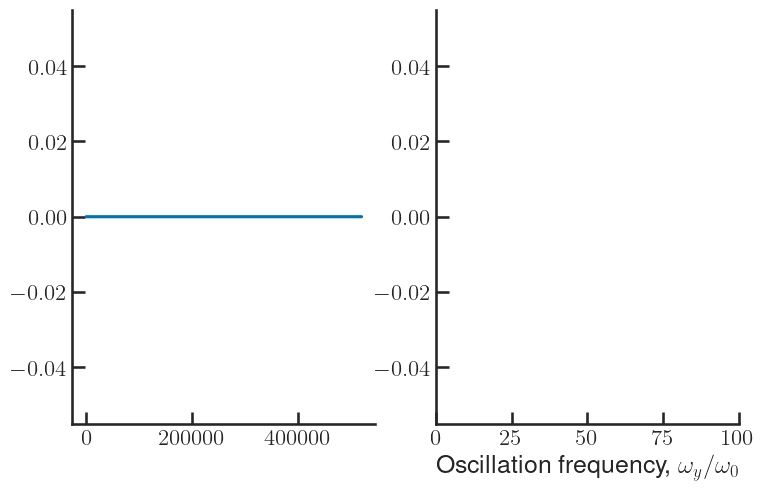

In [4]:
fig, axlist = plt.subplots(1, 2)
# fig, axlist[1] = plt.subplots(1, 1)

axlist[0].plot((mean_y_beam-np.mean(mean_y_beam))[:1000000]/sigma_y[0])
# axlist[0].set_xlim(0*H_RF, 2*H_RF)
fft_beam = np.abs(np.fft.rfft((mean_y_beam-np.mean(mean_y_beam))[:1000000]))
f_0 = c/CIRCUMFERENCE
f_s = f_0*N_SEGMENTS*H_RF
fftfreq_beam = f_s*np.fft.rfftfreq(mean_y_beam[:1000000].shape[0])
axlist[1].plot(fftfreq_beam/f_0, fft_beam/max(fft_beam))
axlist[1].set_xlim(0, 100)
axlist[1].set_xlabel('Oscillation frequency, $\omega_y/\omega_0$')
# axlist[0].set_xlim(0, 20000)
# axlist[0].set_ylim(-1e-8, 1e-8)

In [5]:
bunch_number =250
n_macropartices = int(5e3)
mean_x, sigma_x, mean_xp, mean_y, sigma_y, mean_yp, mean_z, mean_dp = read_bunch(bunch_number, n_macroparticles)
mean_x_ion, sigma_x_ion, mean_xp_ion, mean_y_ion, sigma_y_ion, mean_yp_ion, mean_z_ion, mean_dp_ion = read_ion_element(1)

NameError: name 'SIGMA_X' is not defined

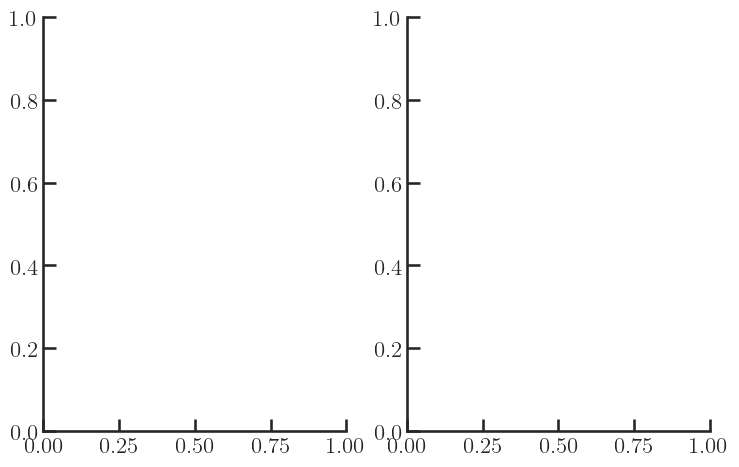

In [6]:
from FIT_FBII import fit_exponential_risetime, fit_sqrt_exponential_risetime, get_envelope
fig, (ax_el, ax_ions) = plt.subplots(1, 2)
# fig, ax_el = plt.subplots(1, 1)
sigma_y[0] = SIGMA_Y
sigma_x[0] = SIGMA_X

for ax in (ax_el,):
    ax.set_ylabel('$\langle u \\rangle/\sigma_{u_0}$')
ax_el.set_xlabel('\# of ion clouds passed')
ax_ions.set_xlabel('\# of electron bunches passed')

    # ax.set_ylim(/-.2, .2)
t = np.linspace(0, 10, mean_x.shape[0])
ax_ions.plot((mean_x_ion)/sigma_x[0], color='b', alpha=0.5)
ax_ions.plot((mean_y_ion)/sigma_y[0], color='r', alpha=0.5)
ax_el.plot(mean_x/sigma_x[0], color='b', alpha=0.5, label='horizontal')
ax_el.plot(mean_y/sigma_y[0], color='r', alpha=0.5, label='vertical')
signal = np.sqrt(mean_y**2+(BETA_Y_SMOOTH*mean_yp)**2)/sigma_y[0]
window_size = 35
rx = fit_exponential_risetime(signal,
                              min_level=1.05*np.mean(np.abs(signal[:10])), 
                              smoothing_window_size=window_size, 
                              start_from_0=False,
                              matplotlib_axis = ax_el
                             )
rx2 = fit_sqrt_exponential_risetime(signal,
                                    min_level=1.05*np.mean(np.abs(signal[:10])),
                                    start_from_0=False,
                                    smoothing_window_size=window_size, 
                                    matplotlib_axis = ax_el
                                   )
print('Risetime computed by exponential fit is {:.2f} turns'.format(rx/50))
print('Risetime computed by exponential of a square root is {:.2f} turns'.format((rx2)**2/50))
print('rx {:.2e}, rx2 {:.2e}'.format(rx, rx2))
# x_envelope, y_envelope = get_envelope(np.arange(len(signal)), signal, window_size=window_size)
# ax_el.plot(x_envelope, y_envelope, marker='.')
# ddt = np.gradient(y_envelope, x_envelope)
# dddt = np.gradient(ddt, x_envelope)
# ax_el.plot(x_envelope, ddt, color='navy')
# ax_el.plot(x_envelope, dddt, color='navy', linestyle='dashed')

# print(x_envelope)
# print(y_envelope)
ax_el.set_ylim(-1, 1.)
# ax_el.set_xlim(0, 200)
ax_ions.set_ylim(-1, 1)
# ax_ions.set_xlim(416*2-20, 416*2+20)
ax_ions.title.set_text('Ions')
# x = np.linspace(100, len(mean_x), len(mean_x)-1)
# y = 0.03*np.exp(np.sqrt(x/400))
# ax_el.plot(x, y, color='black')
ax_el.set_xlim(0,)
ax_el.title.set_text('Electron bunch \#{:}'.format(int(bunch_number)))
plt.figlegend(frameon=False, title='Beam offset')
# fit = 0.002*np.exp(np.sqrt(200*t/(rx2**2)))
# print(fit)
# ax_el.plot(fit)
print(mean_y.shape)
# plt.savefig('Figures/LN_offset.svg')
# plt.savefig('Figures/LN_offset.pdf')

In [ ]:
fig, (ax_el, ax_ions) = plt.subplots(1, 2)
ax_ions.plot((sigma_x_ion)/sigma_x[0], color='b', label='$\langle x \\rangle$', alpha=0.5)
ax_ions.plot((sigma_y_ion)/sigma_y[0], color='r', label='$\langle y \\rangle$', alpha=0.5)
ax_el.plot(sigma_x/sigma_x[0], color='b', alpha=0.5, label='horizontal')
ax_el.plot(sigma_y/sigma_y[0], color='r', alpha=0.5, label='vertical')
ax_el.set_ylim(.9, 5.1)
ax_ions.set_ylim(.5, 3.)
ax_el.set_xlim(0, 10)
print(sigma_x[0], np.sqrt(EPSILON_X*BETA_X_SMOOTH))
print(sigma_y[0], np.sqrt(EPSILON_Y*BETA_Y_SMOOTH))

In [ ]:
sig_x = np.mean(sigma_x_ion[:10])
sig_y = np.mean(sigma_y_ion[:10])
L_sep = 0.85
L_bunch=4*SIGMA_Z
def get_M_e(omega_i, L_sep=0.85, L_bunch=4*SIGMA_Z):
    omega_i_b = omega_i*np.sqrt(L_sep/L_bunch)
    phi_b = omega_i_b*L_bunch/c
    beta_b = c/omega_i_b
    M_e = np.array([[np.cos(phi_b), beta_b*np.sin(phi_b)], [-1/beta_b*np.sin(phi_b), np.cos(phi_b)]])
    return M_e 
@np.vectorize
def get_omega_i(sig_x, sig_y, A=28, intensity_per_bunch=int(1e9), L_sep=0.85):
    return c*np.sqrt(4*intensity_per_bunch*r_u/(3*L_sep*sig_x*(sig_y+sig_x)*A)), c*np.sqrt(4*intensity_per_bunch*r_u/(3*L_sep*sig_y*(sig_y+sig_x)*A))  
@np.vectorize
def get_omega_e(sigma_x, sigma_y, Sigma_I, n_g, N_e, gamma_r):
    return c*np.sqrt(4*Sigma_I*n_g*N_e*r_e/(gamma_r*sigma_x*(sigma_y+sigma_x))), c*np.sqrt(4*Sigma_I*n_g*N_e*r_e/(gamma_r*sigma_y*(sigma_y+sigma_x)))

omega_i_x, omega_i_y = get_omega_i(sig_x, sig_y, L_sep=L_sep, A=28, intensity_per_bunch=INTENSITY_PER_BUNCH)
sig_e_x, sig_e_y = sigma_x[0], sigma_y[0]
omega_e_x, omega_e_y = get_omega_e(sig_e_x, sig_e_y, Sigma_I=1.8e-22, n_g=3.6e12, N_e=INTENSITY_PER_BUNCH, gamma_r=GAMMA)

print('Bunch length in SOLEIL-II is {:.2f} metres'.format(L_bunch))
M_sep  = np.array([[1, L_sep],[0, 1]])
M_e = get_M_e(omega_i_y, L_sep=L_sep, L_bunch = L_bunch)
print('Trapping condition for ions |{:.2f}| < 2'.format( np.trace(M_sep@M_e)) )
print('Ions are trapped', np.abs(np.trace(M_sep@M_e)) < 2)
print('Betatron tunes are {0:.1f}, {1:.1f}'.format(Q_X, Q_Y))
print('Ion bounce tunes are {0:.1f}, {1:.1f}'.format(omega_i_x/OMEGA_REV, omega_i_y/OMEGA_REV))
print('Electron bounce tunes are {0:.3f}, {1:.3f}'.format(omega_e_x/OMEGA_REV, omega_e_y/OMEGA_REV))
def get_t_of_bunch_n(n, omega_e, omega_i, L_sep):
    return 2*Q_Y*OMEGA_REV/(n**2*omega_e**2*omega_i*L_sep/c)
print('The predicted instability growth time for the simulation parameters is {:.2e} turns'.format(get_t_of_bunch_n(416, omega_e_y, omega_i_y, L_sep=0.85)*2*pi*OMEGA_REV))
print('Relativistic gamma is {:.1f}'.format(GAMMA))

In [ ]:
from numpy.fft import rfft, rfftfreq
f_0 = c/CIRCUMFERENCE
N_SEGMENTS = 20
f_s = f_0*N_SEGMENTS
fft_mean_x = np.abs(rfft(mean_x[:]-np.mean(mean_x[:])))
fft_mean_y = np.abs(rfft(mean_y[:]-np.mean(mean_y[:])))

fftfreq_mean_x = f_s*rfftfreq(mean_x[:].shape[0])/f_0
fftfreq_mean_y = f_s*rfftfreq(mean_y[:].shape[0])/f_0
f_s_ions = f_0*416
fft_mean_x_ion = np.abs(rfft(mean_x_ion[:]-np.mean(mean_x_ion[:])))
fft_mean_y_ion = np.abs(rfft(mean_y_ion[:]-np.mean(mean_y_ion[:])))

fftfreq_mean_x_ion = f_s_ions*rfftfreq(mean_x_ion[:].shape[0])/f_0
fftfreq_mean_y_ion = f_s_ions*rfftfreq(mean_y_ion[:].shape[0])/f_0
fig, (ax_el, ax_ions) = plt.subplots(1, 2)
for ax in (ax_el, ax_ions):
    ax.axvline(Q_Y, color='r', linestyle='dashed')
    ax.axvline(Q_X, color='b', linestyle='dashed')
    ax.set_xlabel('$\omega_{x,y}/\omega_0$')
    ax.axvline(omega_i_x/OMEGA_REV, color='b', linestyle='dashdot')
    ax.axvline(omega_i_y/OMEGA_REV, color='r', linestyle='dashdot')
    ax.set_ylim(1e-3, 1)
    ax.set_xlim(0, 150)    
ax_el.plot(fftfreq_mean_x, fft_mean_x/np.max(fft_mean_x))
ax_el.plot(fftfreq_mean_y, fft_mean_y/np.max(fft_mean_y), color='r')

ax_ions.plot(fftfreq_mean_x_ion, fft_mean_x_ion/np.max(fft_mean_x_ion))
ax_ions.plot(fftfreq_mean_y_ion, fft_mean_y_ion/np.max(fft_mean_y_ion), color='r')
ax_el.title.set_text('Electron bunch')
ax_ions.title.set_text('Ions')


In [ ]:
from numpy.fft import rfft, rfftfreq
from scipy.constants import c
CIRCUMFERENCE = 354
f_0 = c/CIRCUMFERENCE
f_s = f_0*250
fft_sigma_x = np.abs(rfft(sigma_x-np.mean(sigma_x)))
fft_sigma_y = np.abs(rfft(sigma_y-np.mean(sigma_y)))

fftfreq_sigma_x = f_s*rfftfreq(sigma_x.shape[0])/f_0
fftfreq_sigma_y = f_s*rfftfreq(sigma_y.shape[0])/f_0
f_s_ions = f_0*416
fft_sigma_x_ion = np.abs(rfft(sigma_x_ion[100:]-np.mean(sigma_x_ion)))
fft_sigma_y_ion = np.abs(rfft(sigma_y_ion[100:]-np.mean(sigma_y_ion)))

fftfreq_sigma_x_ion = f_s_ions*rfftfreq(sigma_x_ion[100:].shape[0])/f_0
fftfreq_sigma_y_ion = f_s_ions*rfftfreq(sigma_y_ion[100:].shape[0])/f_0
fig, (ax_el, ax_ions) = plt.subplots(1, 2)
ax_el.plot(fftfreq_sigma_x, fft_sigma_x/np.max(fft_sigma_x))
ax_el.plot(fftfreq_sigma_y, fft_sigma_y/np.max(fft_sigma_y))
ax_ions.plot(fftfreq_sigma_x_ion, fft_sigma_x_ion/np.max(fft_sigma_x_ion))
ax_ions.plot(fftfreq_sigma_y_ion, fft_sigma_y_ion/np.max(fft_sigma_y_ion))
for ax in [ax_el, ax_ions]:
    ax.axvline(Q_X*2, color='b', linestyle='dashed')
    ax.axvline(Q_Y*2, color='orange', linestyle='dashed')           
    ax.axvline(2*omega_i_x/OMEGA_REV, color='b', linestyle='dashdot')
    ax.axvline(2*omega_i_y/OMEGA_REV, color='orange', linestyle='dashdot')
    ax.set_ylim(1e-3, 1)
    # ax.set_xlim(0, 150)    

In [ ]:
n_ion_macroparticles = np.linspace(1, 50*416, int(50*416))
for i in range(len(n_ion_macroparticles)):
    x, xp, y, yp, z, dp =  read_ion_particles(0, i)
    n_ion_macroparticles[i] = x.shape[0]
fig, ax = plt.subplots(1, 1)
ax.plot(n_ion_macroparticles)
ax.set_ylabel('Number of ion macroparticles')
ax.set_xlabel('Number of electron bunches passed by')
# ax.set_xlim(0,416+100)
# ax.set_xticks([0, 104, 208, 312, 416, 520, 624])
# ax.set_ylim(0,1100)
# plt.savefig('Figures/gap=2_every_104.svg')
# plt.savefig('Figures/gap=2_every_104.pdf')

In [ ]:
x, xp, y, yp, z, dp =  read_ion_particles(0, 8)
fig, axlist = plt.subplots(1, 2)

axlist[0].scatter(x/sigma_x[0], xp*c/omega_i_x/sigma_x[0], alpha=0.05, color='b', marker='.')
# sbs.kdeplot(x/sigma_x[0], xp*c/omega_i_x/sigma_x[0], color='b', ax = axlist[0], levels=10)
print(x.shape)
axlist[1].scatter(y/sigma_y[0], yp*c/omega_i_y/sigma_y[0], alpha=0.05, color='r', marker='.')
# sbs.kdeplot(y/sigma_y[0], yp*c/omega_i_y/sigma_y[0], color='r', ax=axlist[1], levels=10)

print(x.shape)
axlist[0].set_xlabel('Horizontal position, $x/\sigma_{e_x}$')
axlist[0].set_ylabel('Horizontal momentum, $p_x$ (arb. units)')
axlist[1].set_xlabel('Vertical position, $y/\sigma_{e_y}$')
axlist[1].set_ylabel('Vertical momentum, $p_y$ (arb. units)')

for ax in axlist:
    # ax.set_xlim(-5, 5)
    # ax.set_ylim(-1e-23, 1e-23)
    pass
plt.savefig('Figures/transverse_phase_space.svg')
plt.savefig('Figures/transverse_phase_space.pdf')

In [ ]:
from scipy.special import k0
fig, ax = plt.subplots(1, 1)
def get_dist(x, sig_x):
    return 1/(pi*np.sqrt(2*pi)*sig_x)*k0(x**2/(2*sig_x)**2)*np.exp(-x**2/(2*sig_x)**2)
ax.set_xlim(-5, 5)
x = np.linspace(-5, 5, 1000)
y = get_dist(x, 1)
ax.plot(x, y, linestyle='dashed', label='Analytical (P.F. Tavares)', color='black')
for i in range(500, 501, 2):
    x, xp, y, yp, z, dp =  read_ion_particles(0, i)
    ax = sbs.kdeplot((x-np.mean(x))/sigma_x[0],  alpha=1, color='b')
    ax = sbs.kdeplot((y-np.mean(y))/sigma_y[0],  alpha=1, color='r')
ax.set_xlabel('$u/\sigma_u$')
plt.savefig('Figures/distribution_ions.svg')
plt.savefig('Figures/distribution_ions.pdf')